# Data Preprocessing:

In [1]:
import pandas as pd
df = pd.read_excel('EastWestAirlines.xlsx')
print(df.head())

  East-West Airlines is trying to learn more about its customers.  Key issues are their  \
0  flying patterns, earning and use of frequent f...                                      
1  card.  The task is to identify customer segmen...                                      
2                                                NaN                                      
3                                                NaN                                      
4  Source: Based upon real business data; company...                                      

  Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4  
0        NaN        NaN        NaN        NaN  
1        NaN        NaN        NaN        NaN  
2        NaN        NaN        NaN        NaN  
3        NaN        NaN        NaN        NaN  
4        NaN        NaN        NaN        NaN  


In [2]:
excel_file = pd.ExcelFile('EastWestAirlines.xlsx')
print(excel_file.sheet_names)

['Description', 'data']


In [3]:
df = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data', header=1)
print(df.head())

   1  28143  0  1.1  1.2  1.3    174  1.4   0.1  0.2  7000  0.3
0  2  19244  0    1    1    1    215    2     0    0  6968    0
1  3  41354  0    1    1    1   4123    4     0    0  7034    0
2  4  14776  0    1    1    1    500    1     0    0  6952    0
3  5  97752  0    4    1    1  43300   26  2077    4  6935    1
4  6  16420  0    1    1    1      0    0     0    0  6942    0


In [4]:
df = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data', header=0)
print(df.head())

   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1  


In [5]:
missing_values_count = df.isnull().sum()
missing_values_percentage = (df.isnull().sum() / len(df)) * 100

missing_values_table = pd.DataFrame({
    'Missing Values': missing_values_count,
    'Percentage': missing_values_percentage
})

print("Missing values in each column and their percentages:")
print(missing_values_table[missing_values_table['Missing Values'] > 0])

Missing values in each column and their percentages:
Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []


In [6]:
import numpy as np

numerical_cols = df.select_dtypes(include=np.number).columns

outlier_counts = {}

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_counts[col] = len(outliers)

print("Number of outliers in each numerical column:")
for col, count in outlier_counts.items():
    if count > 0:
        print(f"Column '{col}': {count} outliers")
    else:
        print(f"Column '{col}': No outliers detected")

Number of outliers in each numerical column:
Column 'ID#': No outliers detected
Column 'Balance': 266 outliers
Column 'Qual_miles': 226 outliers
Column 'cc1_miles': No outliers detected
Column 'cc2_miles': 43 outliers
Column 'cc3_miles': 18 outliers
Column 'Bonus_miles': 280 outliers
Column 'Bonus_trans': 63 outliers
Column 'Flight_miles_12mo': 569 outliers
Column 'Flight_trans_12': 565 outliers
Column 'Days_since_enroll': No outliers detected
Column 'Award?': No outliers detected


In [7]:
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap outliers
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

print("Outliers capped for all numerical columns. Displaying head of the DataFrame:")
print(df.head())

Outliers capped for all numerical columns. Displaying head of the DataFrame:
   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0  1.0  28143.0         0.0        1.0        1.0        1.0        174.0   
1  2.0  19244.0         0.0        1.0        1.0        1.0        215.0   
2  3.0  41354.0         0.0        1.0        1.0        1.0       4123.0   
3  4.0  14776.0         0.0        1.0        1.0        1.0        500.0   
4  5.0  97752.0         0.0        4.0        1.0        1.0      43300.0   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0          1.0                0.0              0.0             7000.0     0.0  
1          2.0                0.0              0.0             6968.0     0.0  
2          4.0                0.0              0.0             7034.0     0.0  
3          1.0                0.0              0.0             6952.0     0.0  
4         26.0              777.5              2.5          

In [8]:
from sklearn.preprocessing import StandardScaler

# Re-identifying numerical columns in case any previous operation changed dtypes (though unlikely for capping)
numerical_cols = df.select_dtypes(include=np.number).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to the numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("Numerical features scaled using StandardScaler. Displaying head of the DataFrame:")
print(df.head())

Numerical features scaled using StandardScaler. Displaying head of the DataFrame:
        ID#   Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
0 -1.735125 -0.607258         0.0  -0.769578        0.0        0.0   
1 -1.734263 -0.758947         0.0  -0.769578        0.0        0.0   
2 -1.733402 -0.382070         0.0  -0.769578        0.0        0.0   
3 -1.732540 -0.835106         0.0  -0.769578        0.0        0.0   
4 -1.731679  0.579265         0.0   1.409471        0.0        0.0   

   Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
0    -0.843091    -1.148854          -0.604313        -0.626143   
1    -0.840822    -1.039133          -0.604313        -0.626143   
2    -0.624581    -0.819689          -0.604313        -0.626143   
3    -0.825052    -1.148854          -0.604313        -0.626143   
4     1.543191     1.594189           2.034489         2.020176   

   Days_since_enroll    Award?  
0           1.395454 -0.766919  
1           1.379957 -0.7669

In [9]:
print("Descriptive statistics for the DataFrame:")
print(df.describe())

Descriptive statistics for the DataFrame:
               ID#       Balance  Qual_miles     cc1_miles  cc2_miles  \
count  3999.000000  3.999000e+03      3999.0  3.999000e+03     3999.0   
mean      0.000000 -5.685763e-17         0.0  1.705729e-16        0.0   
std       1.000125  1.000125e+00         0.0  1.000125e+00        0.0   
min      -1.735125 -1.086971e+00         0.0 -7.695784e-01        0.0   
25%      -0.865331 -7.711597e-01         0.0 -7.695784e-01        0.0   
50%       0.001017 -3.523592e-01         0.0 -7.695784e-01        0.0   
75%       0.866503  4.881053e-01         0.0  6.831212e-01        0.0   
max       1.728543  2.377003e+00         0.0  2.135821e+00        0.0   

       cc3_miles   Bonus_miles   Bonus_trans  Flight_miles_12mo  \
count     3999.0  3.999000e+03  3.999000e+03       3.999000e+03   
mean         0.0 -2.842882e-17  2.842882e-17      -7.107204e-18   
std          0.0  1.000125e+00  1.000125e+00       1.000125e+00   
min          0.0 -8.527184e-01 -

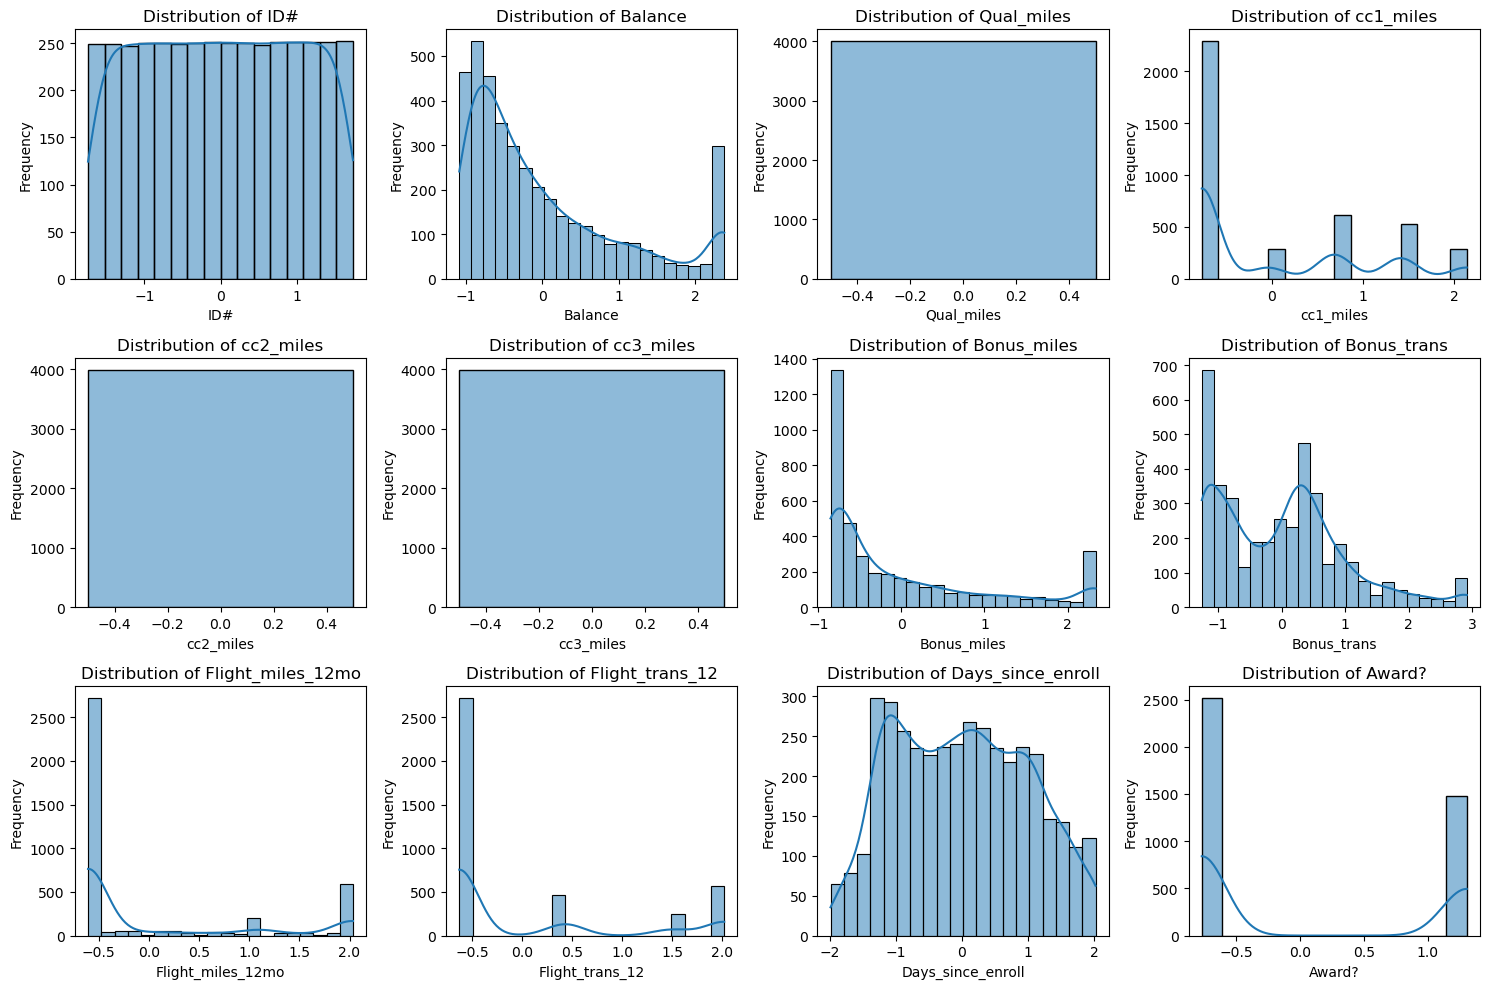

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure size for better visualization
plt.figure(figsize=(15, 10))

# Create histograms for all numerical columns
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 4, i + 1) # Adjust subplot grid as needed
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


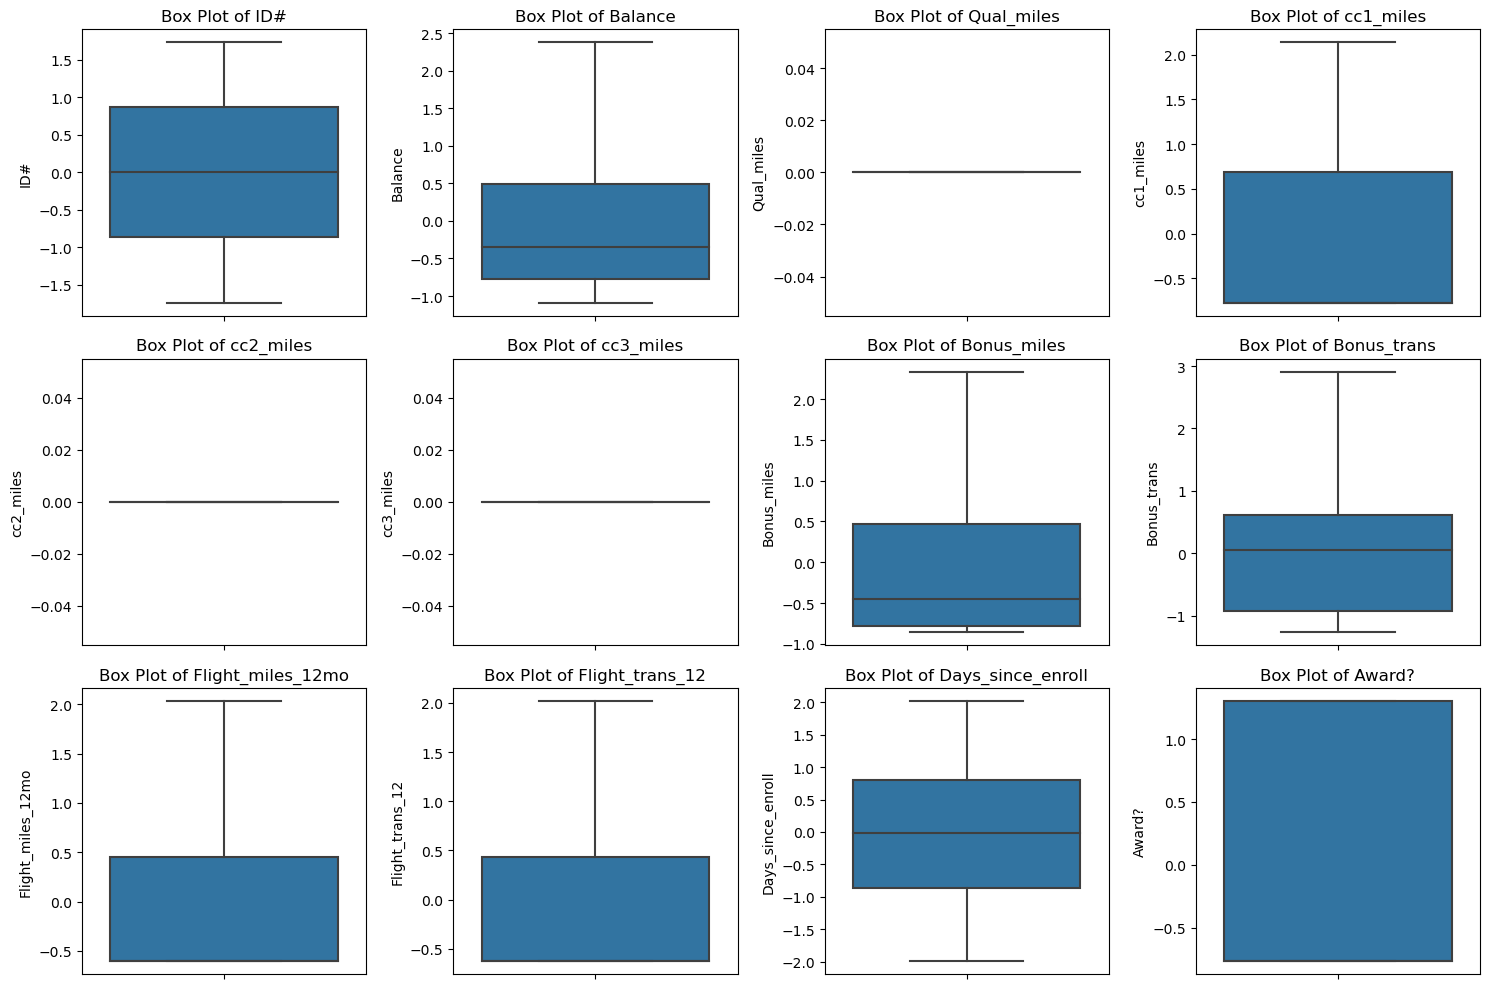

In [11]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_cols):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

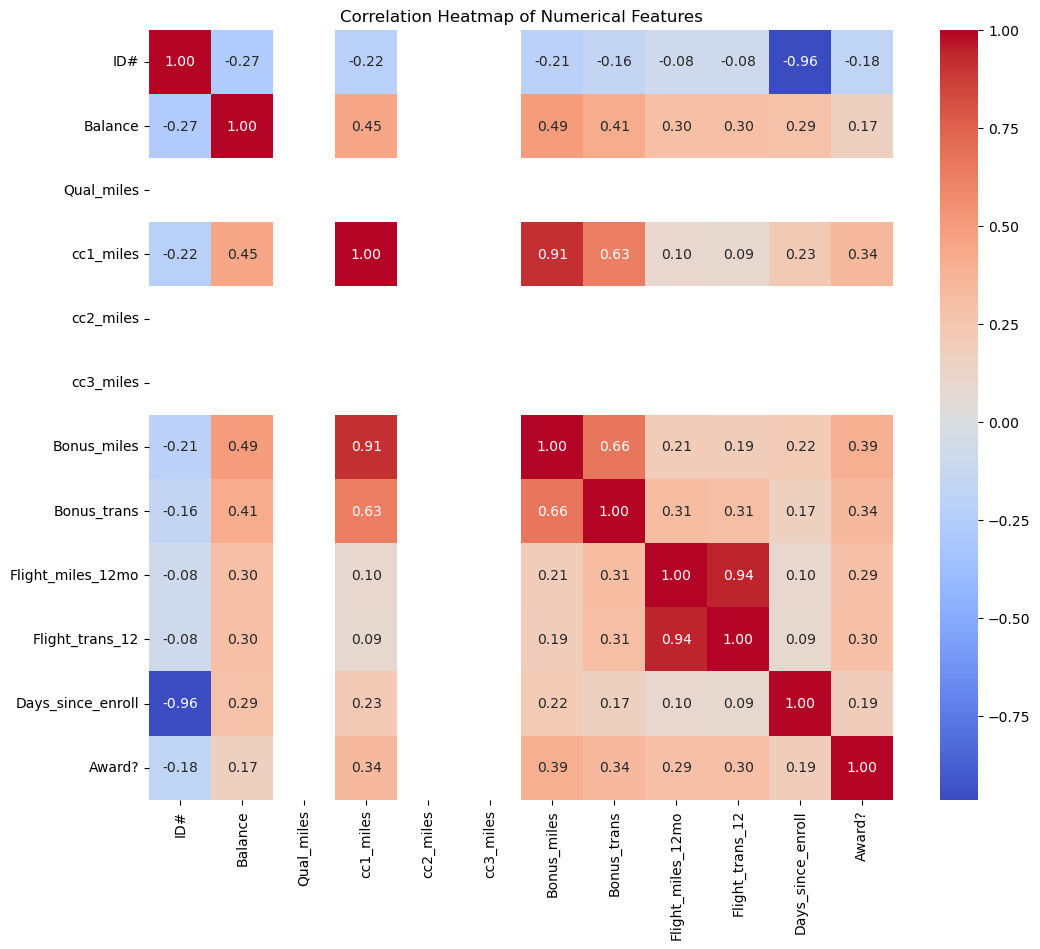

In [12]:
plt.figure(figsize=(12, 10))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

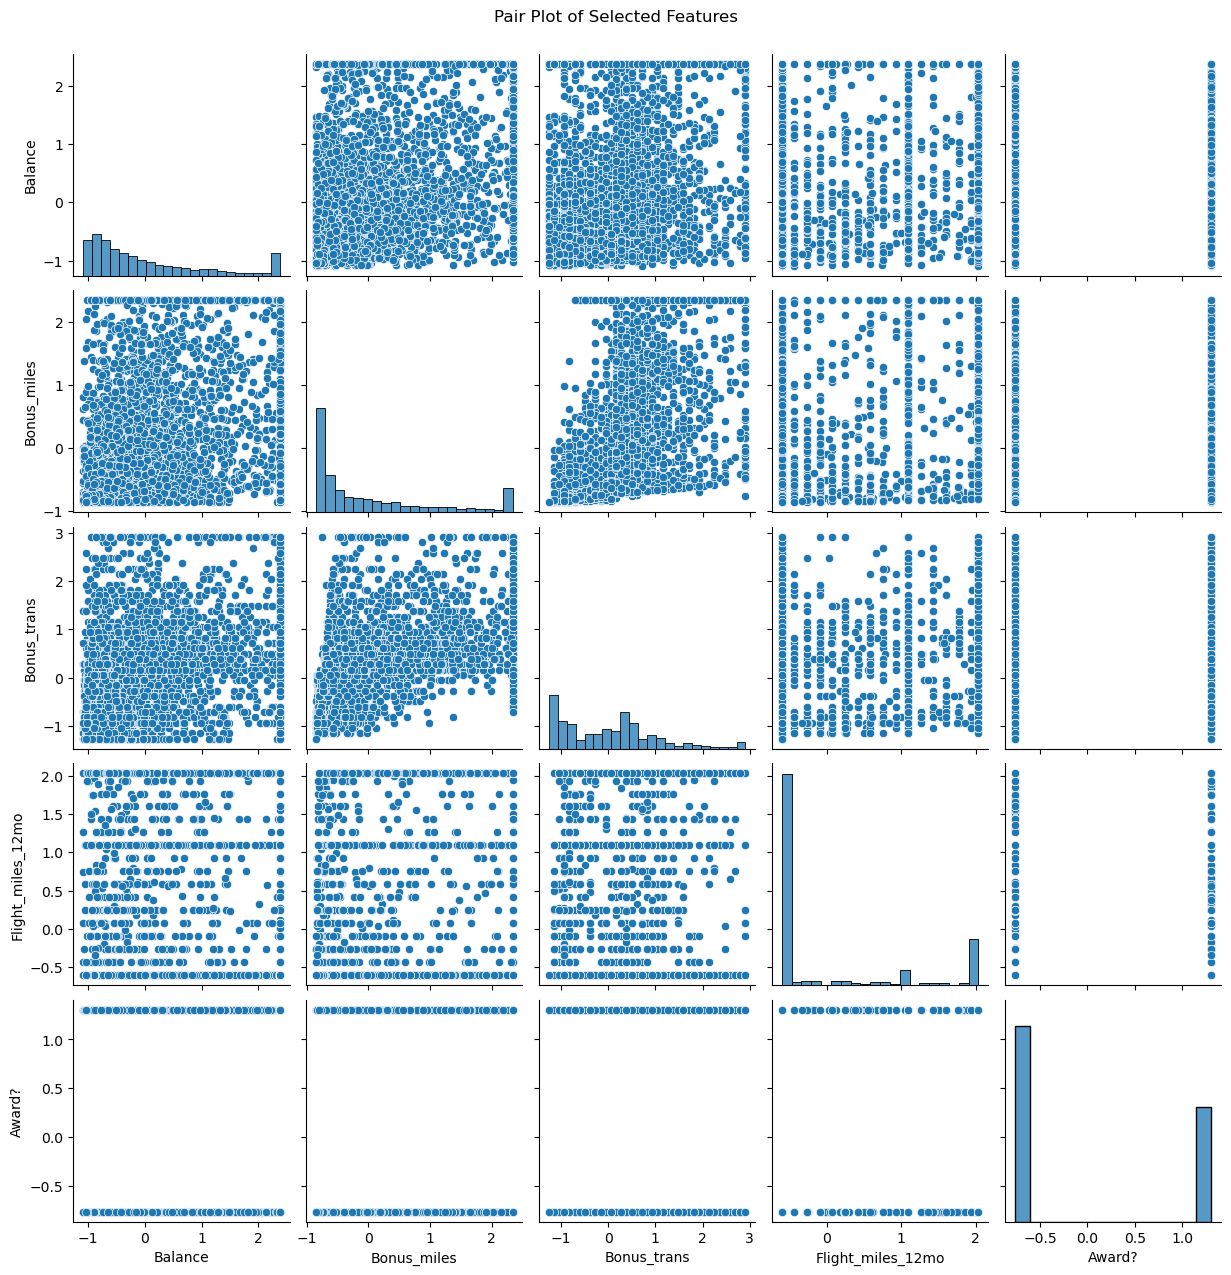

In [13]:
selected_features = ['Balance', 'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Award?']
sns.pairplot(df[selected_features])
plt.suptitle('Pair Plot of Selected Features', y=1.02) # Add a title to the pair plot
plt.show()

# Implementing Clustering Algorithms:



In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. Exclude the 'ID#' column
df_clustering = df.drop('ID#', axis=1)

# 3. Create an empty list to store WCSS values
wcss = []

print("DataFrame for clustering (first 5 rows) without 'ID#':")
print(df_clustering.head())

DataFrame for clustering (first 5 rows) without 'ID#':
    Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0 -0.607258         0.0  -0.769578        0.0        0.0    -0.843091   
1 -0.758947         0.0  -0.769578        0.0        0.0    -0.840822   
2 -0.382070         0.0  -0.769578        0.0        0.0    -0.624581   
3 -0.835106         0.0  -0.769578        0.0        0.0    -0.825052   
4  0.579265         0.0   1.409471        0.0        0.0     1.543191   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0    -1.148854          -0.604313        -0.626143           1.395454   
1    -1.039133          -0.604313        -0.626143           1.379957   
2    -0.819689          -0.604313        -0.626143           1.411920   
3    -1.148854          -0.604313        -0.626143           1.372208   
4     1.594189           2.034489         2.020176           1.363975   

     Award?  
0 -0.766919  
1 -0.766919  
2 -0.766919  
3 -0.766919

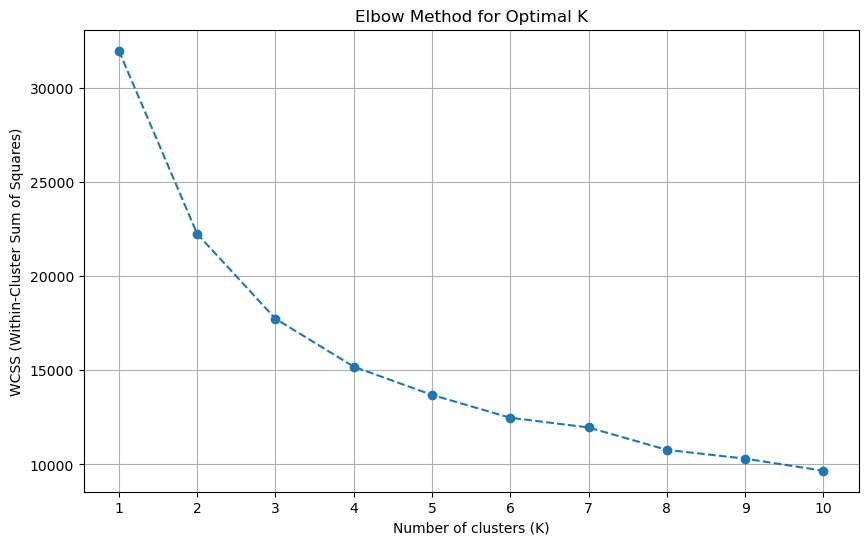

In [15]:
for i in range(1, 11): # Test K from 1 to 10
    kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto')
    kmeans.fit(df_clustering)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


In [16]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
kmeans.fit(df_clustering)
cluster_labels = kmeans.predict(df_clustering)
df['Cluster'] = cluster_labels

print("K-Means clustering applied with K=4. First 5 rows of DataFrame with new 'Cluster' column:")
print(df.head())

K-Means clustering applied with K=4. First 5 rows of DataFrame with new 'Cluster' column:
        ID#   Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
0 -1.735125 -0.607258         0.0  -0.769578        0.0        0.0   
1 -1.734263 -0.758947         0.0  -0.769578        0.0        0.0   
2 -1.733402 -0.382070         0.0  -0.769578        0.0        0.0   
3 -1.732540 -0.835106         0.0  -0.769578        0.0        0.0   
4 -1.731679  0.579265         0.0   1.409471        0.0        0.0   

   Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
0    -0.843091    -1.148854          -0.604313        -0.626143   
1    -0.840822    -1.039133          -0.604313        -0.626143   
2    -0.624581    -0.819689          -0.604313        -0.626143   
3    -0.825052    -1.148854          -0.604313        -0.626143   
4     1.543191     1.594189           2.034489         2.020176   

   Days_since_enroll    Award?  Cluster  
0           1.395454 -0.766919        3  
1 

Silhouette Score: 0.307


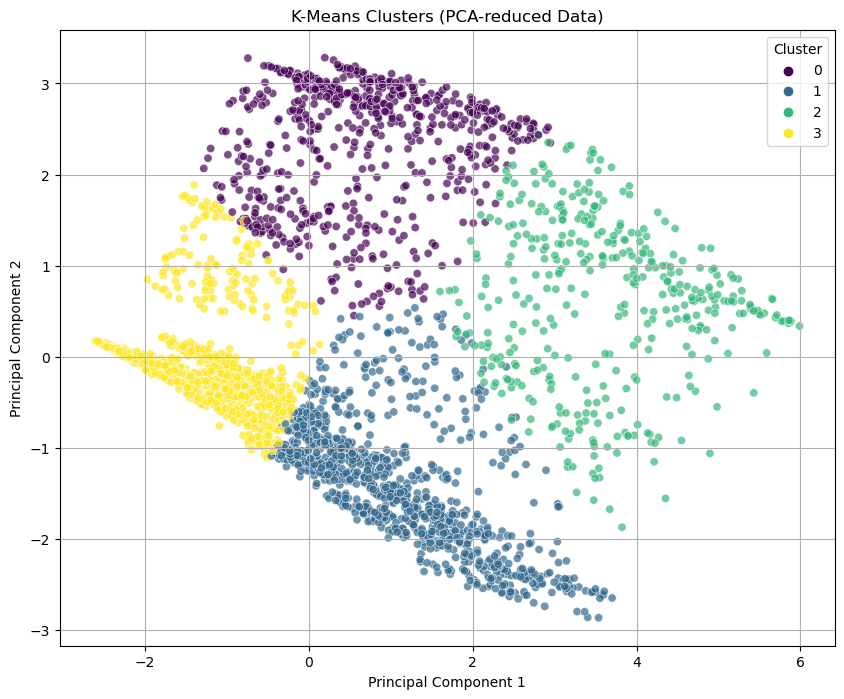

In [17]:
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Calculate the Silhouette Score
silhouette_avg = silhouette_score(df_clustering, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.3f}")

# 4. Initialize PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)

# 6. Fit PCA to df_clustering and transform the data
df_pca = pca.fit_transform(df_clustering)

# Create a DataFrame for the PCA results with cluster labels
df_pca_with_clusters = pd.DataFrame(data=df_pca, columns=['Principal Component 1', 'Principal Component 2'])
df_pca_with_clusters['Cluster'] = cluster_labels

# 7. Create a scatter plot of the two principal components
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Principal Component 1', 
    y='Principal Component 2', 
    hue='Cluster', 
    palette='viridis', 
    data=df_pca_with_clusters, 
    legend='full', 
    alpha=0.7
)

# 8. Add a title to the plot
plt.title('K-Means Clusters (PCA-reduced Data)')

# 9. Add labels for the x-axis and y-axis
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# 10. Display the plot
plt.grid(True)
plt.show()

In [18]:
from sklearn.cluster import DBSCAN

# Initialize DBSCAN with initial parameters
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the DBSCAN model to the df_clustering DataFrame
dbscan.fit(df_clustering)

# Get the cluster labels
dbscan_cluster_labels = dbscan.labels_

# Add these cluster labels as a new column to the original df DataFrame
df['DBSCAN_Cluster'] = dbscan_cluster_labels

# Print the value counts of the 'DBSCAN_Cluster' column
print("DBSCAN Cluster distribution:")
print(df['DBSCAN_Cluster'].value_counts())

DBSCAN Cluster distribution:
-1     1741
 0     1270
 4      197
 1      181
 6      118
 10      98
 2       56
 18      48
 25      43
 24      23
 23      22
 12      22
 17      20
 8       19
 9       19
 11      15
 30       9
 3        8
 26       7
 27       7
 16       7
 15       7
 5        7
 19       6
 22       5
 21       5
 13       5
 14       5
 31       5
 28       5
 29       5
 7        5
 32       5
 20       4
Name: DBSCAN_Cluster, dtype: int64


In [19]:
dbscan_experiment = DBSCAN(eps=0.8, min_samples=5)
dbscan_experiment.fit(df_clustering)
dbscan_cluster_labels_exp = dbscan_experiment.labels_
df['DBSCAN_Cluster_exp1'] = dbscan_cluster_labels_exp

print(f"DBSCAN Cluster distribution with eps=0.8, min_samples=5:")
print(df['DBSCAN_Cluster_exp1'].value_counts())


DBSCAN Cluster distribution with eps=0.8, min_samples=5:
 0     1889
-1      792
 2      655
 4      165
 5      124
 9      112
 7       38
 3       33
 1       27
 14      16
 8       15
 15      15
 21      14
 18      14
 12      10
 22      10
 11       9
 25       8
 23       8
 13       7
 20       7
 16       6
 10       6
 6        5
 17       5
 19       5
 24       4
Name: DBSCAN_Cluster_exp1, dtype: int64


In [20]:
dbscan_experiment2 = DBSCAN(eps=1.0, min_samples=10)
dbscan_experiment2.fit(df_clustering)
dbscan_cluster_labels_exp2 = dbscan_experiment2.labels_
df['DBSCAN_Cluster_exp2'] = dbscan_cluster_labels_exp2

print(f"DBSCAN Cluster distribution with eps=1.0, min_samples=10:")
print(df['DBSCAN_Cluster_exp2'].value_counts())

DBSCAN Cluster distribution with eps=1.0, min_samples=10:
 0     1936
 2      698
-1      691
 4      180
 3      178
 6      123
 5       58
 1       50
 7       26
 8       24
 11      14
 9       11
 10      10
Name: DBSCAN_Cluster_exp2, dtype: int64


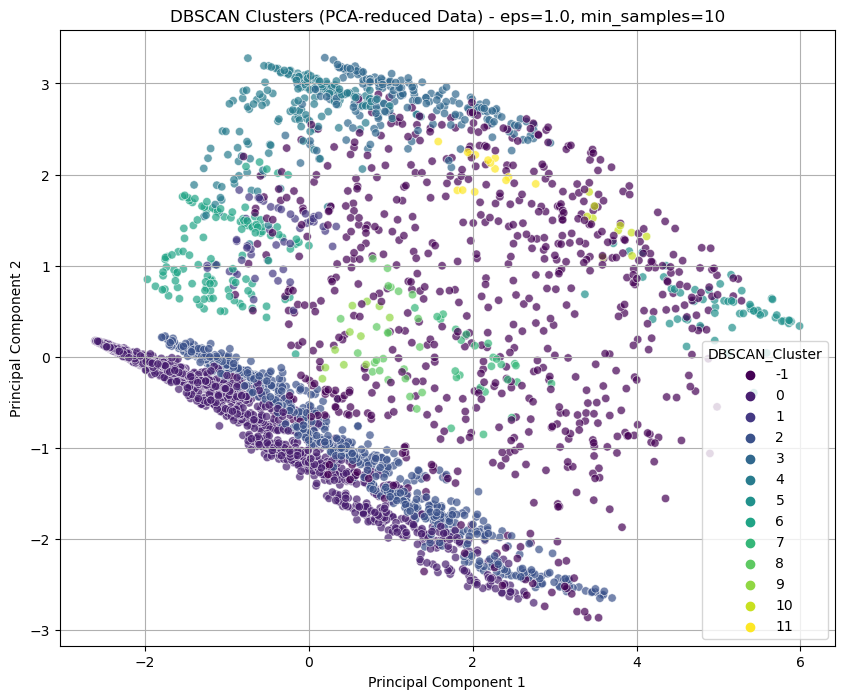

In [21]:
df_pca_with_dbscan_clusters = pd.DataFrame(data=df_pca, columns=['Principal Component 1', 'Principal Component 2'])
df_pca_with_dbscan_clusters['DBSCAN_Cluster'] = df['DBSCAN_Cluster_exp2']

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Principal Component 1',
    y='Principal Component 2',
    hue='DBSCAN_Cluster',
    palette='viridis',
    data=df_pca_with_dbscan_clusters,
    legend='full',
    alpha=0.7
)

plt.title('DBSCAN Clusters (PCA-reduced Data) - eps=1.0, min_samples=10')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [22]:
from sklearn.metrics import silhouette_score

# Filter out noise points (cluster label -1)
non_noise_indices = df['DBSCAN_Cluster_exp2'] != -1
df_clustering_filtered = df_clustering[non_noise_indices]
dbscan_cluster_labels_filtered = df['DBSCAN_Cluster_exp2'][non_noise_indices]

# Ensure there are more than one cluster and more than one sample to calculate Silhouette Score
if len(set(dbscan_cluster_labels_filtered)) > 1 and len(dbscan_cluster_labels_filtered) > 1:
    silhouette_avg_dbscan = silhouette_score(df_clustering_filtered, dbscan_cluster_labels_filtered)
    print(f"DBSCAN Silhouette Score (eps=1.0, min_samples=10, noise excluded): {silhouette_avg_dbscan:.3f}")
else:
    print("Cannot compute Silhouette Score: Not enough clusters or samples after filtering noise.")

DBSCAN Silhouette Score (eps=1.0, min_samples=10, noise excluded): 0.033


# Cluster Analysis and Interpretation: 

In [23]:
cluster_characteristics = df.groupby('Cluster').mean().drop('ID#', axis=1)
print("Mean of each feature for every K-Means cluster:")
print(cluster_characteristics)

Mean of each feature for every K-Means cluster:
          Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
Cluster                                                                       
0        0.210716         0.0  -0.615362        0.0        0.0    -0.428046   
1        0.424917         0.0   1.013280        0.0        0.0     0.820236   
2        1.045038         0.0   1.427584        0.0        0.0     1.602210   
3       -0.529234         0.0  -0.675302        0.0        0.0    -0.663477   

         Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
Cluster                                                                       
0          -0.105698           1.591311         1.588702           0.004452   
1           0.578703          -0.515501        -0.505365           0.312483   
2           1.476532           1.563470         1.510710           0.447013   
3          -0.604685          -0.553379        -0.547157          -0.272652   

  

In [24]:
df_dbscan_clusters = df[df['DBSCAN_Cluster_exp2'] != -1]
cluster_characteristics_dbscan = df_dbscan_clusters.groupby('DBSCAN_Cluster_exp2').mean().drop(['ID#', 'DBSCAN_Cluster', 'DBSCAN_Cluster_exp1'], axis=1)

print("Mean of each feature for every DBSCAN cluster (noise excluded):")
print(cluster_characteristics_dbscan)

Mean of each feature for every DBSCAN cluster (noise excluded):
                      Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
DBSCAN_Cluster_exp2                                                          
0                   -0.266804         0.0  -0.294224        0.0        0.0   
1                   -0.618702         0.0  -0.740524        0.0        0.0   
2                   -0.186729         0.0   0.453145        0.0        0.0   
3                    0.420410         0.0  -0.745095        0.0        0.0   
4                   -0.148138         0.0  -0.765543        0.0        0.0   
5                    1.727301         0.0   1.973018        0.0        0.0   
6                   -0.407928         0.0  -0.763673        0.0        0.0   
7                   -0.157495         0.0   1.297725        0.0        0.0   
8                   -0.471797         0.0   0.622592        0.0        0.0   
9                    0.148395         0.0   0.683121        0.0        0.0   
